#**Pregunta 1, Claudio Vergara, IA para negocios, UACH, Luis Vidal, 2023**

#**CASO DE MAMMATERRA**
"MAMMATERRA" es un local de comida rapida saludable que tiene un servicio de reparto a domicilio en una poblacion determinada, para ello se requiere de un muestreo de rutas que permita un reparto mas rapido a los domicilios.






# **Carga de librerías:**

Primero cargamos la librería numpy

In [ ]:
# Se guarda como np para usarla más adelante (np.)
import numpy as np

#**Parámetros**

Ahora crearemos los parámetros alpha y gamma, que corresponden a la tasa de aprendizaje y al factor de descuento (respectivamente)



In [ ]:
#Se utilizan estos valores para alpha y gamma porque han demostrado llegar a buenos resultados
gamma= 0.75
alpha= 0.9

# **PASO 1. Definir el entorno**


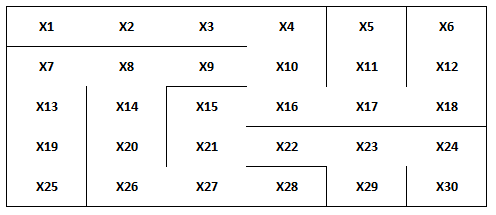

In [ ]:
#Estados
location_to_state = {'X1' : 0,
                     'X2' : 1,
                     'X3' : 2,
                     'X4' : 3,
                     'X5' : 4,
                     'X6' : 5,
                     'X7' : 6,
                     'X8' : 7,
                     'X9' : 8,
                     'X10': 9,
                     'X11' : 10,
                     'X12' : 11,
                     'X13' : 12,
                     'X14' : 13,
                     'X15' : 14,
                     'X16' : 15,
                     'X17' : 16,
                     'X18' : 17,
                     'X19' : 18,
                     'X20': 19,
                     'X21' : 20,
                     'X22' : 21,
                     'X23' : 22,
                     'X24' : 23,
                     'X25' : 24,
                     'X26' : 25,
                     'X27' : 26,
                     'X28' : 27,
                     'X29' : 28,
                     'X30' : 29,
                     }

In [ ]:
#Acciones
actions = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

Ahora se crea la matríz de recompensas
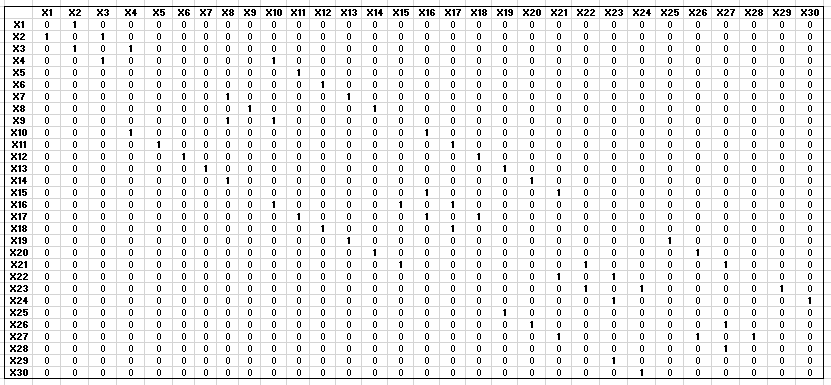

In [ ]:
#Recompensas
R= np.array([[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],  #X1
[1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X2
[0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X3
[0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X4
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X5
[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X6
[0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X7
[0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X8
[0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X9
[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X10
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X11
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],               #X12
[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],              #X13
[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],               #X14
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0],               #X15
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X16
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],               #X17
[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],               #X18
[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],               #X19
[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],               #X20
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0],               #X21
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0],               #X22
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0],               #X23
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1],               #X24
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],               #X25
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0],               #X26
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0],               #X27
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],               #X28
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],               #X29
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]])             #X30

In [ ]:
print(R)


[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0

#**PASO 2. Implementación de Q-Learning**

In [ ]:
#Se implementa una función mapping
state_to_location = {state: location for location, state in location_to_state.items()}
#Descomente para ver que hace esta función mapping
#print (state_to_location)

In [ ]:
#Función que devuelve el camino más corto desde la ubicación inicial a la final
def route(starting_location, ending_location):
  R_new = np.copy(R)
  ending_state = location_to_state[ending_location]
  R_new[ending_state, ending_state] = 1000    # se realiza una copia de la matriz R y se asigna la recompensa en la ubicación final V=1000
  Q = np.array(np.zeros([ 30, 30]))           # se inicializa en este punto
  for i in range(1000):                       # se incluye toda la lógica del algoritmo de Q-learning en route
    current_state = np.random.randint(0, 30)
    playable_actions = []
    for j in range(30):
      if R_new[current_state, j] > 0:
        playable_actions.append(j)
    next_state = np.random.choice(playable_actions)
    TD = R_new[current_state, next_state]+ gamma * Q[next_state, np.argmax(Q[next_state,])]- Q[current_state, next_state]
    Q[current_state, next_state] = Q[current_state, next_state] + alpha * TD
  route = [starting_location]
  next_location = starting_location
  while (next_location != ending_location):
    starting_state = location_to_state[starting_location]
    next_state = np.argmax(Q[starting_state,])
    next_location = state_to_location[next_state]
    route.append(next_location)
    starting_location = next_location
  return route

#**PASO 3. Sistema en la distribución de productos**

In [ ]:
# Imprimir la ruta final, ahora, el sistema permite llegar desde un punto de distribución a otro
print('Ruta Propuesta por la I.A.:' )

# Ingreso Interactivo de la forma "X2"
A=input("Ingrese estado de Inicio: ")
B=input("Ingrese estado Final: ")

print(" ")
print("Ruta:")
route(A , B )

Ruta Propuesta por la I.A.:
Ingrese estado de Inicio: X1
Ingrese estado Final: X28
 
Ruta:


['X1', 'X2', 'X3', 'X4', 'X10', 'X16', 'X15', 'X21', 'X27', 'X28']